# Please excuse my sloppy, rushed data-cleaning

Feel free to revise the csv in this repository. It was a product of a quick scan over [this Wikipedia page](https://en.wikipedia.org/wiki/Time_Person_of_the_Year).

In [249]:
%pylab inline

import pandas as pd
mpl.style.use('default')

Populating the interactive namespace from numpy and matplotlib


In [202]:
df = pd.read_csv('PersonOfTheYearFlags.csv', index_col='Year')
yearRange = (df.index.min(), df.index.max()+1)

df.head()

,HeadCount,American
Year,,
1927,Man,True
1928,Man,True
1929,Man,True
1930,Man,False
1931,Man,False


In [203]:
print(df.HeadCount.value_counts())

Man             66
Wide Group       6
Narrow Group     5
Group            4
Woman            4
Pair             4
Other            2
Name: HeadCount, dtype: int64


### Data Dictionary

Headcount

    Wide Group: Groups that captured a wide-range of people, whether they were aware of it or not.
    Narrow Group: A team/collection of people, referred by name.
    Group: A specific group of people, but not granular enough to name names.
    Other: 'Earth' and 'Computer' lol
    
American

    As far as I could tell scanning Wikipedia, their citizenship/home at the time of receiving PotY

In [258]:
def plot_poty_colorbars(column, colorMapping, legendHandles):
    fig, ax = plt.subplots(figsize=(18, 10))
    ax.set_xlim(yearRange)

    for year in range(*yearRange):
        group = df.loc[year][column]
        groupColor = colorMapping.get(group)
        ax.axvspan(xmin=year, xmax=year+1, color=groupColor)
        
    ax.yaxis.set_visible(False)

    plt.legend(handles=legendHandles, fontsize=12, loc=2)
    return ax

#### Let's look at headcount

Text(0.5,1,'Recipient Type By Year')

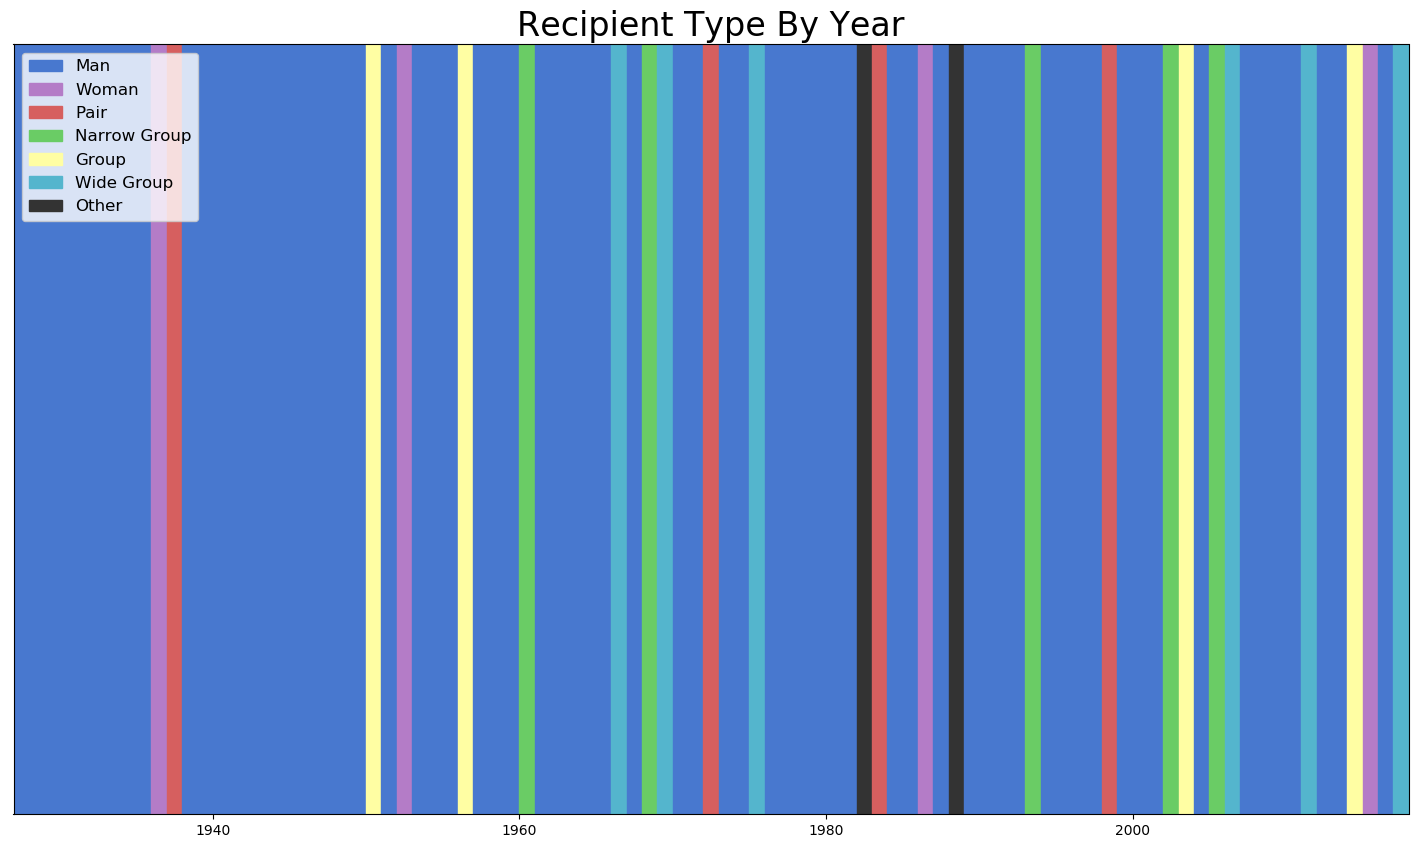

In [259]:
groupMap = {'Man':'#4878CF'
           , 'Woman':'#B47CC7'
           , 'Pair': '#D65F5F'
           , 'Narrow Group': '#6ACC65'
           , 'Group': '#FFFEA3'
           , 'Wide Group': '#54B5CD'
           , 'Other': '#333333'}

groupHandles = [mpl.patches.Patch(color=y, label=x) for x, y in groupMap.items()]

ax1 = plot_poty_colorbars('HeadCount', groupMap, groupHandles)
ax1.set_title('Recipient Type By Year', fontsize=24)

#### Where the winners Americans?

In [191]:
usaMap = {True: 'white', False:'red'}
usaHandles = [mpl.patches.Patch(color=y, label=x) for x, y in usaMap.items()]

Text(0.5,1,'American Winner?')

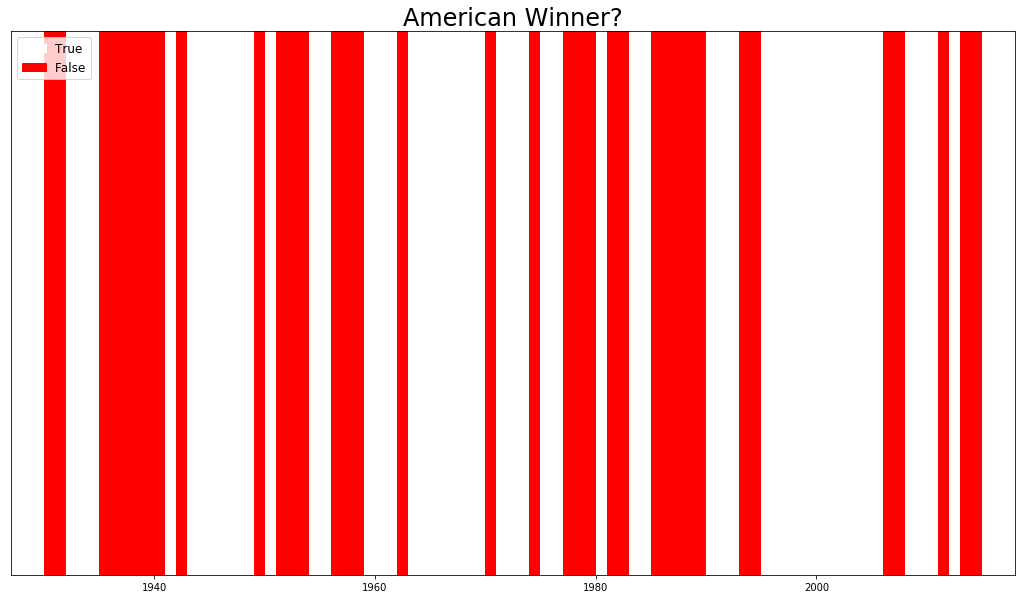

In [183]:
ax2 = plot_poty_colorbars('American', usaMap, usaHandles)
ax2.set_title('American Winner?', fontsize=24)